#Again, this sprint has changed since DS12. I'm putting my code for different assignments in different places, just sort of doing them anywhere based on the DS18 answer keys.

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


#NEW DS18 Day 2 ASSIGNMENT  
### --see solution for most of the instructions

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip

--2020-07-21 13:16:20--  https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20478 (20K) [application/x-httpd-php]
Saving to: ‘student.zip’

student.zip         100%[===================>]  20.00K  --.-KB/s    in 0.1s    

2020-07-21 13:16:21 (146 KB/s) - ‘student.zip’ saved [20478/20478]



In [ ]:
!unzip student.zip

Archive:  student.zip
  inflating: student-mat.csv         
  inflating: student-por.csv         
  inflating: student-merge.R         
  inflating: student.txt             


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('student-mat.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
columns = []
for col in df:
  columns.append(col)

columns2 = df.columns.tolist()


for col in columns:
  print(df[col].value_counts(), '\n')

GP    349
MS     46
Name: school, dtype: int64 

F    208
M    187
Name: sex, dtype: int64 

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64 

U    307
R     88
Name: address, dtype: int64 

GT3    281
LE3    114
Name: famsize, dtype: int64 

T    354
A     41
Name: Pstatus, dtype: int64 

4    131
2    103
3     99
1     59
0      3
Name: Medu, dtype: int64 

2    115
3    100
4     96
1     82
0      2
Name: Fedu, dtype: int64 

other       141
services    103
at_home      59
teacher      58
health       34
Name: Mjob, dtype: int64 

other       217
services    111
teacher      29
at_home      20
health       18
Name: Fjob, dtype: int64 

course        145
home          109
reputation    105
other          36
Name: reason, dtype: int64 

mother    273
father     90
other      32
Name: guardian, dtype: int64 

1    257
2    107
3     23
4      8
Name: traveltime, dtype: int64 

2    198
1    105
3     65
4     27
Name: studytime,

In [ ]:
contingency = pd.crosstab(df['absences'], df['G1'])
contingency

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
absences,,,,,,,,,,,,,,,,,
0,0,1,3,10,16,14,6,10,9,7,13,8,5,7,4,1,1
1,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0
2,0,0,0,1,4,6,5,9,8,8,6,4,7,5,1,0,1
3,0,0,0,0,1,0,1,1,1,0,1,3,0,0,0,0,0
4,0,0,1,3,3,8,3,11,5,2,3,6,5,1,1,0,1
5,0,0,0,0,2,1,0,0,0,0,0,0,0,1,0,1,0
6,0,0,2,1,3,2,3,6,3,2,2,2,1,1,0,3,0
7,0,0,0,1,0,1,0,1,0,1,1,0,1,1,0,0,0
8,1,0,0,0,1,4,3,2,2,2,1,3,1,1,0,1,0


In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('chi_2', chi2, '\np value', p, '\ndof', dof, '\nexpected', expected)

chi_2 485.84612539760076 
p value 0.9053685634151726 
dof 528 
expected [[2.91139241e-01 2.91139241e-01 2.03797468e+00 6.98734177e+00
  1.07721519e+01 1.19367089e+01 9.02531646e+00 1.48481013e+01
  1.13544304e+01 1.01898734e+01 9.60759494e+00 8.73417722e+00
  6.98734177e+00 6.40506329e+00 2.32911392e+00 2.32911392e+00
  8.73417722e-01]
 [7.59493671e-03 7.59493671e-03 5.31645570e-02 1.82278481e-01
  2.81012658e-01 3.11392405e-01 2.35443038e-01 3.87341772e-01
  2.96202532e-01 2.65822785e-01 2.50632911e-01 2.27848101e-01
  1.82278481e-01 1.67088608e-01 6.07594937e-02 6.07594937e-02
  2.27848101e-02]
 [1.64556962e-01 1.64556962e-01 1.15189873e+00 3.94936709e+00
  6.08860759e+00 6.74683544e+00 5.10126582e+00 8.39240506e+00
  6.41772152e+00 5.75949367e+00 5.43037975e+00 4.93670886e+00
  3.94936709e+00 3.62025316e+00 1.31645570e+00 1.31645570e+00
  4.93670886e-01]
 [2.02531646e-02 2.02531646e-02 1.41772152e-01 4.86075949e-01
  7.49367089e-01 8.30379747e-01 6.27848101e-01 1.03291139e+00
  7.89

In [ ]:
contingency = pd.crosstab(df['famsize'], df['Pstatus'])
contingency

Pstatus,A,T
famsize,,
GT3,21,260
LE3,20,94


In [ ]:
# null hypothesis: famsize and Pstatus are not dependent on each other
# alternative hypothesis: famsize and Pstatus are dependent on each other
# confidence level: 95%

chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('chi_2', chi2, '\np value', p, '\ndof', dof, '\nexpected', expected)

# Conclusion: Due to a p-value of < 0.05 I reject the null hypothesis that famsize and Pstatus are independent
# and suggest the alternative, that they are dependent.

chi_2 7.792090028014622 
p value 0.00524754575877353 
dof 1 
expected [[ 29.16708861 251.83291139]
 [ 11.83291139 102.16708861]]


In [ ]:
df['absences'].mean()

5.708860759493671

In [ ]:
from scipy import stats

stats.ttest_1samp(df['absences'], 10)

Ttest_1sampResult(statistic=-10.65646456747913, pvalue=1.807264255585786e-23)

In [ ]:
columns = []
for col in df:
  columns.append(col)

In [ ]:
columns2 = df.columns.tolist()

In [ ]:
contingency = pd.crosstab(df['traveltime'], df['G1'])
contingency

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
traveltime,,,,,,,,,,,,,,,,,
1,1,0,4,15,21,27,23,30,23,22,19,23,20,18,5,4,2
2,0,1,2,7,14,8,4,16,14,12,12,4,4,3,2,3,1
3,0,0,0,2,2,4,3,2,1,1,2,3,0,1,1,1,0
4,0,0,1,0,0,2,1,3,1,0,0,0,0,0,0,0,0


In [ ]:
# Travel time and G1 independent

chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('chi_2', chi2, '\np value', p, '\ndof', dof, '\nexpected', expected)

chi_2 44.197271699124165 
p value 0.6294127072708722 
dof 48 
expected [[6.50632911e-01 6.50632911e-01 4.55443038e+00 1.56151899e+01
  2.40734177e+01 2.66759494e+01 2.01696203e+01 3.31822785e+01
  2.53746835e+01 2.27721519e+01 2.14708861e+01 1.95189873e+01
  1.56151899e+01 1.43139241e+01 5.20506329e+00 5.20506329e+00
  1.95189873e+00]
 [2.70886076e-01 2.70886076e-01 1.89620253e+00 6.50126582e+00
  1.00227848e+01 1.11063291e+01 8.39746835e+00 1.38151899e+01
  1.05645570e+01 9.48101266e+00 8.93924051e+00 8.12658228e+00
  6.50126582e+00 5.95949367e+00 2.16708861e+00 2.16708861e+00
  8.12658228e-01]
 [5.82278481e-02 5.82278481e-02 4.07594937e-01 1.39746835e+00
  2.15443038e+00 2.38734177e+00 1.80506329e+00 2.96962025e+00
  2.27088608e+00 2.03797468e+00 1.92151899e+00 1.74683544e+00
  1.39746835e+00 1.28101266e+00 4.65822785e-01 4.65822785e-01
  1.74683544e-01]
 [2.02531646e-02 2.02531646e-02 1.41772152e-01 4.86075949e-01
  7.49367089e-01 8.30379747e-01 6.27848101e-01 1.03291139e+00
  7.898

In [ ]:
contingency = pd.crosstab(df['failures'], df['G1'])
contingency

G1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
failures,,,,,,,,,,,,,,,,,
0,0,0,3,9,21,33,22,44,34,30,29,27,20,22,8,7,3
1,1,0,0,8,9,3,5,5,5,4,4,3,2,0,0,1,0
2,0,1,1,3,4,1,3,1,0,1,0,0,2,0,0,0,0
3,0,0,3,4,3,4,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print('chi_2', chi2, '\np value', p, '\ndof', dof, '\nexpected', expected)

chi_2 129.34458682097306 
p value 2.1514735234833574e-09 
dof 48 
expected [[ 0.78987342  0.78987342  5.52911392 18.95696203 29.22531646 32.38481013
  24.48607595 40.2835443  30.80506329 27.64556962 26.06582278 23.69620253
  18.95696203 17.37721519  6.31898734  6.31898734  2.36962025]
 [ 0.12658228  0.12658228  0.88607595  3.03797468  4.6835443   5.18987342
   3.92405063  6.4556962   4.93670886  4.43037975  4.17721519  3.79746835
   3.03797468  2.78481013  1.01265823  1.01265823  0.37974684]
 [ 0.04303797  0.04303797  0.30126582  1.03291139  1.59240506  1.76455696
   1.33417722  2.19493671  1.67848101  1.50632911  1.42025316  1.29113924
   1.03291139  0.94683544  0.3443038   0.3443038   0.12911392]
 [ 0.04050633  0.04050633  0.2835443   0.9721519   1.49873418  1.66075949
   1.2556962   2.06582278  1.57974684  1.41772152  1.33670886  1.21518987
   0.9721519   0.89113924  0.32405063  0.32405063  0.12151899]]


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
# instructions wanted 2 independent pairs and 2 dependent pairs. Here's a bunch of pairs
columns = []
for col in df:
  columns.append(col)

columns2 = df.columns.tolist()

dependent_pairs = []

for i in range(0,2):
  count = i
  for col in columns:
    contingency = pd.crosstab(df[col], df[columns[count + 1]])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    if p < 0.05:
      pair = (col, columns[count + 1])
      dependent_pairs.append(pair)
    count += 1
    print('RESULTS FOR ', col.upper(), 'and ', columns[count+1].upper(), '\n', 'chi2: ', chi2, '\n', 'p: ', p, '\n', 'dof: ', dof, '\n', 'exp: ', expected)
   

RESULTS FOR  SCHOOL and  AGE 
 chi2:  0.007584677753178483 
 p:  0.9305999299762074 
 dof:  1 
 exp:  [[183.77721519 165.22278481]
 [ 24.22278481  21.77721519]]
RESULTS FOR  SEX and  ADDRESS 
 chi2:  5.99460281380294 
 p:  0.5403796955381378 
 dof:  7 
 exp:  [[43.17974684 54.76455696 51.60506329 43.17974684 12.63797468  1.57974684
   0.52658228  0.52658228]
 [38.82025316 49.23544304 46.39493671 38.82025316 11.36202532  1.42025316
   0.47341772  0.47341772]]
RESULTS FOR  AGE and  FAMSIZE 
 chi2:  21.212531837116867 
 p:  0.0034680030378527907 
 dof:  7 
 exp:  [[18.26835443 63.73164557]
 [23.16962025 80.83037975]
 [21.83291139 76.16708861]
 [18.26835443 63.73164557]
 [ 5.34683544 18.65316456]
 [ 0.66835443  2.33164557]
 [ 0.22278481  0.77721519]
 [ 0.22278481  0.77721519]]
RESULTS FOR  ADDRESS and  PSTATUS 
 chi2:  1.7080569422911414 
 p:  0.19123766649306323 
 dof:  1 
 exp:  [[ 62.60253165  25.39746835]
 [218.39746835  88.60253165]]
RESULTS FOR  FAMSIZE and  MEDU 
 chi2:  7.792090028

IndexError: ignored

In [ ]:
dependent_pairs

[('age', 'address'),
 ('famsize', 'Pstatus'),
 ('Pstatus', 'Medu'),
 ('Medu', 'Fedu'),
 ('Fedu', 'Mjob'),
 ('Mjob', 'Fjob'),
 ('famsup', 'paid'),
 ('freetime', 'goout'),
 ('goout', 'Dalc'),
 ('Dalc', 'Walc'),
 ('G1', 'G2'),
 ('G2', 'G3')]

In [ ]:
# So grades are definitely dependent on each other. Makes sense. 

# to do a chi square test, you take your 2 categorical variables and 
# crosstab them, then do a chi^2 test on that contingency table.

contingency = pd.crosstab(df['G2'], df['G3'])

chi2, p, dof, expected = chi2_contingency(contingency)
print('chi2: ', chi2, '\n', 'p: ', p, '\n', 'dof: ', dof, '\n', 'exp: ', expected)

In [ ]:
df.head(1)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6


In [ ]:
# we have to do a chi^2 by hand

# let's do address and travel time


observed = pd.crosstab(df['freetime'], df['studytime'])

observed

studytime,1,2,3,4
freetime,,,,
1,2,11,3,3
2,19,28,11,6
3,35,82,29,11
4,29,61,21,4
5,20,16,1,3


In [ ]:
df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6


In [ ]:
observed_w_tots = pd.crosstab(df['freetime'], df['studytime'], margins=True)

observed_w_tots

studytime,1,2,3,4,All
freetime,,,,,
1,2,11,3,3,19
2,19,28,11,6,64
3,35,82,29,11,157
4,29,61,21,4,115
5,20,16,1,3,40
All,105,198,65,27,395


In [ ]:
# chi^2 = sum((obs - expected)**0.5 / expected)

# expected = row_tot * column_tot / grand_tot

grand_tot = df.shape[0]

# changed contingency --> observed after runtime closed
row_tots = observed['All'][:-1].tolist()
column_tots = df['traveltime'].value_counts().sort_index().values

In [ ]:
# populate expected values

expected = np.array([[0,0,0,0], 
                     [0,0,0,0]])

for i, row_total in enumerate(row_tots): 
  for j, col_total in enumerate(column_tots):
    expected_value = (row_total*col_total / grand_tot)
    # print(expected_value, i, j)
    expected[i][j] = expected_value

expected

array([[ 57,  23,   5,   1],
       [199,  83,  17,   6]])

In [ ]:
observed_values = observed.values

In [ ]:
# chi^2 calculation

chi2 = ((observed_values - expected)**2 / expected).sum()
chi2

55.07991425214064

In [ ]:
# dof

row_number = len(observed.index)
column_number = len(observed.columns)
dof = (row_number - 1) * (column_number - 1)
dof

3

In [ ]:
# check with scipy

chi2, p, dof, expected = stats.chi2_contingency(observed)
print('chi2: ', chi2, '\n', 'p: ', p, '\n', 'dof: ', dof, '\n', 'exp: ', expected)

chi2:  43.96115908406922 
 p:  1.5381274806593009e-09 
 dof:  3 
 exp:  [[ 57.2556962   23.83797468   5.12405063   1.78227848]
 [199.7443038   83.16202532  17.87594937   6.21772152]]


In [ ]:
contingency

Fedu,0,1,2,3,4
age,,,,,
15,1,10,25,18,28
16,1,17,31,31,24
17,0,22,30,24,22
18,0,21,21,20,20
19,0,10,5,7,2
20,0,0,3,0,0
21,0,1,0,0,0
22,0,1,0,0,0




### 2. Check For Understanding - Study and write your own explanations/definitions for these topics:

- What is a sample "estimate" in statistics?

__A sample estimate is an estimate of a population parameter, based on only your sample. For example, if I have a sample mean, that is an estimate of the population mean.__

- What are hypothesis test? How are they useful?
__Hypothesis tests examine the likelihood that divergence from an expected "null" hypothesis could be due to random chance. They allow us to determine whether an apparently interesting result -- say, a drug treatment group outperforming a placebo -- is significant, or could still just be due to chance.__

- What is a "null hypothesis?"
__A made up, expected result. The "uninteresting" result. "Nothing to see here."
"The average of this sample is the same as the average of the population from whence it came."__

- What is a p-value and what does it represent?
__The likelihood that the result could be due to random chance, i.e. is insignificant__

- What does it mean for something to be "statistically significant?"
__There is an acceptably low likelihood that the thing was due to random chance. (This has nothing to do with impact size, which is "how much the difference is".)__

- What is a test statistic and how does it relate to a p-value?
__The t statistic is how many standard deviations you are away from the mean. Positive is greater than the mean; negative, less than. You use the t stat and the degrees of freedom to find your p-value. More degrees of freedom makes the t distribution approach the standard normal distribution, which uses z scores.__

- What are "degrees of freedom" and how are they calculated in a 1-sample, 2-sample, and chi^2 test for independence?
__Degrees of freedom = sample size - however many population parameters you estimated n. Each number in the sample is free to vary except the final n numbers because they must be certain things to make the estimate true.__
-__1sample --> n - 1__
-__2sample --> n - 1 where n is the smaller sample__
-__chi^2 --> (rows - 1) * (columns - 1)__

# BEGINNING OF OLD ASSIGNMENT

In [ ]:
# TODO - your code!
# df fillna(method=bfill) or something

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-01-23 20:59:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-01-23 20:59:47 (594 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [ ]:
# Name columns, turn data into numbers, format NaNs

column_headers = ['party', 'handicapped-infants', 'water-project', 
'budget', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups', 
'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration', 
'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free', 
'south-africa']

df = pd.read_csv('house-votes-84.data', 
                 header=None, 
                 names=column_headers, 
                 na_values='?')
                 
df = df.replace({'y': 1, 'n': 0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [ ]:
# Split df into separate parties

rep = df[df['party']=='republican']
dem = df[df['party']=='democrat']

In [ ]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  stderr = s / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [ ]:
# Remove NaNs from rep['physician-fee-freeze']

col = rep['physician-fee-freeze']

np.isnan(col)

physician_fee_freeze_no_nans = col[-np.isnan(col)]

physician_fee_freeze_no_nans

0      1.0
1      1.0
7      1.0
8      1.0
10     1.0
      ... 
427    1.0
430    1.0
432    1.0
433    1.0
434    1.0
Name: physician-fee-freeze, Length: 165, dtype: float64

In [ ]:
# Get confidence interval

confidence_interval(physician_fee_freeze_no_nans)
# 95% confident that the sample mean will fall between ~0.97101 and ~1.00475

(0.9878787878787879, 0.9710067448304756, 1.0047508309271003)

In [ ]:

from scipy.stats import bayes_mvs

CI_bayes = bayes_mvs(physician_fee_freeze_no_nans, 0.95)

CI_bayes

(Mean(statistic=0.9878787878787879, minmax=(0.9710067448304756, 1.0047508309271003)),
 Variance(statistic=0.012196034418256639, minmax=(0.009812494257409895, 0.015147557859480966)),
 Std_dev(statistic=0.11026536448466456, minmax=(0.09905803479481054, 0.12307541533336773)))

In [ ]:
CI_bayes[0][1][0]

0.9710067448304756

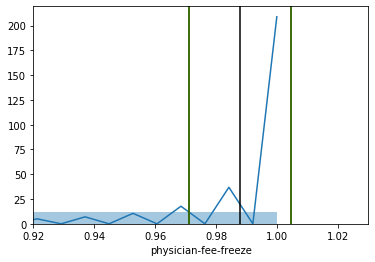

In [ ]:
import seaborn as sns

sns.distplot(physician_fee_freeze_no_nans)
plt.xlim(0.92, 1.03)
CI = confidence_interval(physician_fee_freeze_no_nans)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');
plt.axvline(x=CI_bayes[0][1][0], color='green')
plt.axvline(x=CI_bayes[0][1][1], color='green')


In [ ]:
# We conclude that, given a sample of Republican voters on the issue of the
# physician fee freeze, the mean vote is 95% sure to fall very close to 1
# (precise numbers above)
# This suggests that nearly all Republicans are voting for this bill.

In [ ]:
# Chi Squared stuff

# Note I did 2 separate crosstabs using two different methods I've seen, 
# and I'm getting different values.

# For Evidence: I'm looking at this today before 1:1.
# I'll try to resolve it, and if I can't I'd like to ask you about it.


In [ ]:
# load 'Adults' dataset

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# Create a crosstab

crosstab = pd.crosstab(df.education,df.workclass)

crosstab

workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
education,,,,,,,,
10th,6,31,2,695,19,67,13,0
11th,9,36,1,923,14,60,14,0
12th,5,19,0,333,7,19,10,0
1st-4th,0,4,0,136,2,13,1,0
5th-6th,1,9,0,266,4,19,4,0
7th-8th,2,28,1,424,14,94,10,1
9th,3,23,0,387,10,34,6,0
Assoc-acdm,55,88,0,729,35,71,41,1
Assoc-voc,38,86,0,1005,38,108,46,0


In [ ]:
# Here's one way I saw to get the chi^2 statistic

from scipy.stats import chisquare 

print(chisquare(crosstab, axis=None))

Power_divergenceResult(statistic=411198.8097965827, pvalue=0.0)


In [ ]:
# This method returns a different chi^2 statistic. I haven't figured out why yet.

chi_2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)

print("Chi^2 Statistic", chi_2_stat)
print("p value", p_value)
print("Degrees of Freedom", dof)
print("Expected Value Table", expected)

Chi^2 Statistic 2247.5388548117335
p value 0.0
Degrees of Freedom 105
Expected Value Table [[2.60270138e+01 5.67443124e+01 1.89780309e-01 6.15321985e+02
  3.02564036e+01 6.88902522e+01 3.51906916e+01 3.79560618e-01]
 [3.30258747e+01 7.20032872e+01 2.40813670e-01 7.80786721e+02
  3.83925793e+01 8.74153621e+01 4.46537347e+01 4.81627339e-01]
 [1.22792514e+01 2.67713263e+01 8.95362083e-02 2.90301969e+02
  1.42746298e+01 3.25016436e+01 1.66025712e+01 1.79072417e-01]
 [4.87420667e+00 1.06267860e+01 3.55410903e-02 1.15234369e+02
  5.66626526e+00 1.29014158e+01 6.59033360e+00 7.10821806e-02]
 [9.46720911e+00 2.06404882e+01 6.90317331e-02 2.23820602e+02
  1.10056306e+01 2.50585191e+01 1.28004557e+01 1.38063466e-01]
 [1.79345810e+01 3.91011229e+01 1.30772986e-01 4.24003385e+02
  2.08489504e+01 4.74705940e+01 2.42490480e+01 2.61545972e-01]
 [1.44663954e+01 3.15397559e+01 1.05484133e-01 3.42009699e+02
  1.68171847e+01 3.82907404e+01 1.95597722e+01 2.10968267e-01]
 [3.18698129e+01 6.94828316e+01 2.

In [ ]:
# Trying another 2 variables to reproduce the problem.

crosstab3 = pd.crosstab(df.sex,df.race)

crosstab3

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


In [ ]:
# Doing it "by hand"(?) using Numpy

crosstab3_by_hand = np.array([[119,346,1555,109,8642], [192,693,1569,162,19174]]).T
print(crosstab3_by_hand)
print(chisquare(crosstab3_by_hand, axis=None))

[[  119   192]
 [  346   693]
 [ 1555  1569]
 [  109   162]
 [ 8642 19174]]
Power_divergenceResult(statistic=104994.76947882435, pvalue=0.0)


In [ ]:
# Testing the .T
# Result is the same with and without .T (transpose)

crosstab3_by_hand = np.array([[119,346,1555,109,8642], [192,693,1569,162,19174]])
print(crosstab3_by_hand)
print(chisquare(crosstab3_by_hand, axis=None))

[[  119   346  1555   109  8642]
 [  192   693  1569   162 19174]]
Power_divergenceResult(statistic=104994.76947882435, pvalue=0.0)


In [ ]:
# Same result using the first method I used above

print(chisquare(crosstab3, axis=None))

Power_divergenceResult(statistic=104994.76947882435, pvalue=0.0)


In [ ]:
# different result again. 
# I went through the expected value table and the ratios look right.


chi_2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab3)

print("Chi^2 Statistic", chi_2_stat)
print("p value", p_value)
print("Degrees of Freedom", dof)
print("Expected Value Table", expected)

Chi^2 Statistic 454.2671089131088
p value 5.192061302760456e-97
Degrees of Freedom 4
Expected Value Table [[  102.87709223   343.69549461  1033.40204539    89.64531188
   9201.3800559 ]
 [  208.12290777   695.30450539  2090.59795461   181.35468812
  18614.6199441 ]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)